### 서울지하철 유/무임 승차 데이터

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [110]:
df = pd.read_csv('201905-subwayfee.csv', encoding='cp949')
df = df.replace(',', '', regex=True) # 콤마 제거
df = df.dropna() # na(Null) 제거
df.head() # default = 5

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시
0,2019-05,1호선,150,서울역,1568570,1489737,247801,242107,2019-06-03 10:56:20
1,2019-05,1호선,151,시청,709821,727110,112279,112016,2019-06-03 10:56:20
2,2019-05,1호선,152,종각,1204910,1151371,176083,164915,2019-06-03 10:56:20
3,2019-05,1호선,153,종로3가,699000,647664,408682,382809,2019-06-03 10:56:20
4,2019-05,1호선,154,종로5가,561662,578374,307515,295535,2019-06-03 10:56:20


In [111]:
arr = np.array(df)

- 유임승차비율이 가장 높은 곳 (유임승차 / 무임승차)

In [112]:
유임승차 = arr[:, 4].astype(np.int)
arr[유임승차.argmax()]

array(['2019-05', '2호선', 222, '강남', '2894341', '2974378', '192979',
       '172755', '2019-06-03 10:56:20'], dtype=object)

In [113]:
무임승차 = arr[:, 6].astype(np.int)
유임승차비율 = 유임승차 / (무임승차 + 1)
idx = 유임승차비율.argmax()
arr[idx, 1:4:2], 유임승차[idx], 무임승차[idx]

(array(['분당선', '복정'], dtype=object), 24, 0)

- 유무임 승하차가 가장 많은 곳?

In [114]:
전체승하차인원 = arr[:, 4:8].astype(np.int)
역이용총인원 = 전체승하차인원.sum(1)
idx = 역이용총인원.argmax()
arr[idx, 1:4:2], 전체승하차인원[idx], 역이용총인원[idx]

(array(['2호선', '강남'], dtype=object),
 array([2894341, 2974378,  192979,  172755]),
 6234453)

- 모등 역의 유무임 승하차 비율은 어떻게 될까 : Pie

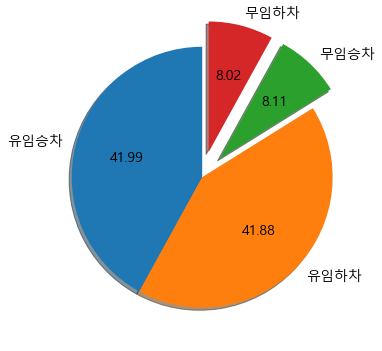

In [119]:
승차분류별총인원 = 전체승하차인원.sum(0)

plt.figure(figsize=(6, 6))
plt.rc('font', family='Malgun Gothic', size=14)
pie_exp = [0, 0, 0.2, 0.2]
plt.pie(승차분류별총인원, labels=df.columns[4:8], shadow=True, autopct='%.2f', explode=pie_exp, startangle=90)
plt.savefig('all_subway_ratio.png')
#plt.title('')
plt.show()

- 모든 역마다 유무임 승차 비율을 따로 파이 차트로 나타내기

In [116]:
for i in range(len(arr)):
    row = arr[i]
    승하차인원 = row[4:8].astype(np.int)
    if 승하차인원[0] > 1000000: # 유임승차 인원 100만이상만 대상으로 한다.
        plt.rc('font', family='Malgun Gothic', size=14)
        #plt.title(row[3] + '역의 유무임 승차 비율')
        plt.pie(row[4:8], labels=df.columns[4:8], shadow=True, autopct='%.2f', explode=[0, 0, 0.2, 0.2], startangle=90)
        plt.savefig('subway_' + row[3] + '_ratio.png')
        plt.close()